#### AI 헬스케어 첫번째 미니 프로젝트 “흡연 여부 데이터 분석을 통한 건강 인사이트 도출” 에 오신 여러분 환영합니다.
이번 프로젝트에서는 흡연여부를 판단하는 데이터를 가지고 시각화 및 가설을 판별해보려고 합니다.


A-Z로 진행되는 만큼 천천히 따라해보세요!

#### 개인과제
- 데이터 구조, 분포 확인, 전처리 : 1.1_흡연여부데이터
- 데이터 간 관계 가설 수립 및 검증 : 1.2_데이터분석



### 흡연여부데이터 분석하기
최근 여러 기관에서는 흡연이 개인의 건강에 미치는 영향을 정확히 파악하고,
이를 기반으로 예방 중심의 건강관리 정책을 수립하려는 노력을 강화하고 있습니다.

하지만 “흡연 여부”를 직접 조사하는 것은 현실적으로 쉽지 않습니다.
이에 따라, 건강검진 데이터를 통해 흡연 여부를 데이터 기반으로 추정하고,
흡연자와 비흡연자 간의 생체·건강 지표 차이를 검증하려는 프로젝트가 시작되었습니다.

여러분은 이 프로젝트의 데이터 분석가이자 AI 엔지니어로 참여하게 되었습니다.
주어진 데이터에는 개인의 건강검진 결과(혈압, 혈당, 콜레스테롤, BMI 등)와
흡연 여부(label = 0 또는 1)가 포함되어 있습니다.

이제 여러분의 역할은 흡연 여부 데이터의 특성을 분석하고 시각화하며,
통계적 검정을 통해 변수 간 관계를 규명하는 것입니다.
시작해봅시다 !

#### 🎯 프로젝트 목표

	•	흡연자와 비흡연자 간의 건강 지표 차이 분석
	•	주요 변수들의 분포, 상관관계, 통계적 유의성 검증
	•	시각화를 통한 데이터 인사이트 도출
	•	추후 흡연 여부 예측 모델 개발을 위한 기초 분석 기반 마련




---



### 데이터 알아보기

#### 데이터 안내
- 'smoking_health_data.csv'
- 건강 정보 데이터


## 1. 데이터 불러오기
### 모든 데이터 분석의 시작은 '데이터 불러오기' 부터 입니다!
### 데이터 프레임을 불러오고 변수로 저장해봅시다!
- csv : pd.read_csv("파일이름. csv")
- txt : pd.read_csv("파일이름. csv", sep="구분자")
- xlsx : pd.read_excel('파일이름.xlsx')
- pickle : pd.read_pickle("파일이름.pkl")

[참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용됩니다)

##### [TODO] 데이터 로딩
- Pandas 라이브러리를 활용해서 'smoking_health_data.csv' 파일을 'health_data' 변수에 저장하세요.
- 데이터 프레임의 크기를 확인해보세요. (shape)

In [7]:
!pip list

Package                                  Version
---------------------------------------- --------------------
absl-py                                  1.4.0
accelerate                               1.12.0
access                                   1.1.9
affine                                   2.4.0
aiofiles                                 24.1.0
aiohappyeyeballs                         2.6.1
aiohttp                                  3.13.2
aiosignal                                1.4.0
aiosqlite                                0.21.0
alabaster                                1.0.0
albucore                                 0.0.24
albumentations                           2.0.8
ale-py                                   0.11.2
alembic                                  1.17.2
altair                                   5.5.0
annotated-types                          0.7.0
antlr4-python3-runtime                   4.9.3
anyio                                    4.11.0
anywidget                          

In [1]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import pandas as pd
health_data = pd.read_csv("/content/smoking_health_data (3).csv")
health_data

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
0,TRAIN_0000,35,170,70,24.22,1.10,1,98.0,40.0,80.0,1.3,211,75,120,15.9,1,1.53,1
1,TRAIN_0001,40,150,55,24.44,1.00,0,173.0,39.0,104.0,0.6,251,46,184,11.8,1,1.45,0
2,TRAIN_0002,60,170,50,17.30,0.75,0,96.0,40.0,61.0,0.8,144,43,89,15.3,1,1.04,0
3,TRAIN_0003,40,150,45,20.00,0.50,0,92.0,40.0,46.0,0.7,178,66,110,13.4,1,1.18,0
4,TRAIN_0004,55,155,65,27.06,NaN,0,87.0,42.0,95.0,0.9,232,62,151,13.8,1,1.32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,TRAIN_6995,25,170,65,22.49,1.50,0,87.0,45.0,141.0,1.2,184,44,112,14.9,1,1.50,0
6996,TRAIN_6996,60,165,65,23.88,0.90,0,87.0,45.0,82.0,0.9,184,64,103,14.3,1,1.47,1
6997,TRAIN_6997,40,180,100,30.86,1.20,0,97.0,44.0,87.0,0.9,178,54,107,15.6,1,1.00,0
6998,TRAIN_6998,60,150,55,24.44,0.60,0,89.0,57.0,161.0,0.6,157,49,76,14.4,1,1.00,0


In [2]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
health_data.shape

(7000, 18)

## 기본 정보 확인 및 클렌징
- 데이터 클렌징이란 ? 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정입니다.

##### [TODO] 기본 정보 확인하기
- 'health_data' 데이터의 정보를 확인해보세요.
- 'describe', 'info', 'head', 'tail' 등 전부 활용해봅시다.

In [3]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7000 non-null   object 
 1   나이        7000 non-null   int64  
 2   키(cm)     7000 non-null   int64  
 3   몸무게(kg)   7000 non-null   int64  
 4   BMI       7000 non-null   float64
 5   시력        6860 non-null   float64
 6   충치        7000 non-null   int64  
 7   공복 혈당     6860 non-null   float64
 8   혈압        6860 non-null   float64
 9   중성 지방     6860 non-null   float64
 10  혈청 크레아티닌  7000 non-null   float64
 11  콜레스테롤     7000 non-null   int64  
 12  고밀도지단백    7000 non-null   int64  
 13  저밀도지단백    7000 non-null   int64  
 14  헤모글로빈     7000 non-null   float64
 15  요 단백      7000 non-null   int64  
 16  간 효소율     7000 non-null   float64
 17  label     7000 non-null   int64  
dtypes: float64(8), int64(9), object(1)
memory usage: 984.5+ KB


In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
health_data.describe()

,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
count,7000.000000,7000.000000,7000.000000,7000.000000,6860.000000,7000.000000,6860.000000,6860.000000,6860.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,43.973571,164.781429,65.932857,24.144423,1.011414,0.227429,99.307289,45.555102,127.028134,0.884900,197.276571,57.355429,115.346857,14.631914,1.083857,1.144696,0.367286
std,12.063793,9.170213,12.978702,3.501945,0.430137,0.419202,21.190058,8.831564,73.219161,0.241523,36.306494,14.506945,41.788153,1.540907,0.392051,0.432735,0.482100
min,20.000000,135.000000,30.000000,14.270000,0.100000,0.000000,57.000000,14.000000,21.000000,0.100000,86.000000,18.000000,1.000000,4.900000,1.000000,0.140000,0.000000
25%,35.000000,160.000000,55.000000,21.600000,0.800000,0.000000,89.000000,40.000000,74.000000,0.800000,173.000000,47.000000,92.000000,13.600000,1.000000,0.840000,0.000000
50%,40.000000,165.000000,65.000000,23.880000,1.000000,0.000000,96.000000,45.000000,107.000000,0.900000,195.000000,55.000000,113.000000,14.800000,1.000000,1.100000,0.000000
75%,50.000000,170.000000,75.000000,26.120000,1.200000,0.000000,104.000000,50.000000,161.000000,1.000000,219.000000,66.000000,136.000000,15.700000,1.000000,1.380000,1.000000
max,85.000000,190.000000,130.000000,42.450000,9.900000,1.000000,386.000000,91.000000,399.000000,10.000000,395.000000,157.000000,1340.000000,20.900000,5.000000,5.670000,1.000000


In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
health_data.head()

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
0,TRAIN_0000,35,170,70,24.22,1.10,1,98.0,40.0,80.0,1.3,211,75,120,15.9,1,1.53,1
1,TRAIN_0001,40,150,55,24.44,1.00,0,173.0,39.0,104.0,0.6,251,46,184,11.8,1,1.45,0
2,TRAIN_0002,60,170,50,17.30,0.75,0,96.0,40.0,61.0,0.8,144,43,89,15.3,1,1.04,0
3,TRAIN_0003,40,150,45,20.00,0.50,0,92.0,40.0,46.0,0.7,178,66,110,13.4,1,1.18,0
4,TRAIN_0004,55,155,65,27.06,NaN,0,87.0,42.0,95.0,0.9,232,62,151,13.8,1,1.32,0


In [6]:
health_data.tail()

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
6995,TRAIN_6995,25,170,65,22.49,1.50,0,87.0,45.0,141.0,1.2,184,44,112,14.9,1,1.50,0
6996,TRAIN_6996,60,165,65,23.88,0.90,0,87.0,45.0,82.0,0.9,184,64,103,14.3,1,1.47,1
6997,TRAIN_6997,40,180,100,30.86,1.20,0,97.0,44.0,87.0,0.9,178,54,107,15.6,1,1.00,0
6998,TRAIN_6998,60,150,55,24.44,0.60,0,89.0,57.0,161.0,0.6,157,49,76,14.4,1,1.00,0
6999,TRAIN_6999,50,165,65,23.88,0.65,0,104.0,47.0,124.0,0.8,251,56,170,13.6,1,0.81,0


In [7]:
health_data.isnull().sum()

,0
ID,0
나이,0
키(cm),0
몸무게(kg),0
BMI,0
시력,140
충치,0
공복 혈당,140
혈압,140
중성 지방,140


##### [TODO] 위 데이터에서 BMI를 기준으로 체중 상태 구분 칼럼을 만들어보세요.
- BMI 구간을 기준으로 건강상태를 분류해볼까요 ?
- 저체중 (<18.5)
- 정상 (<25)
- 과체중 (<30)
- 비만 (>=30)


In [8]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 방법 1
def classify_bmi(bmi):
    if bmi < 18.5:
        return '저체중'
    elif bmi < 25:
        return '정상'
    elif bmi < 30:
        return '과체중'
    else:
        return '비만'

health_data['BMI_Class'] = health_data['BMI'].apply(classify_bmi)
health_data

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label,BMI_Class
0,TRAIN_0000,35,170,70,24.22,1.10,1,98.0,40.0,80.0,1.3,211,75,120,15.9,1,1.53,1,정상
1,TRAIN_0001,40,150,55,24.44,1.00,0,173.0,39.0,104.0,0.6,251,46,184,11.8,1,1.45,0,정상
2,TRAIN_0002,60,170,50,17.30,0.75,0,96.0,40.0,61.0,0.8,144,43,89,15.3,1,1.04,0,저체중
3,TRAIN_0003,40,150,45,20.00,0.50,0,92.0,40.0,46.0,0.7,178,66,110,13.4,1,1.18,0,정상
4,TRAIN_0004,55,155,65,27.06,NaN,0,87.0,42.0,95.0,0.9,232,62,151,13.8,1,1.32,0,과체중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,TRAIN_6995,25,170,65,22.49,1.50,0,87.0,45.0,141.0,1.2,184,44,112,14.9,1,1.50,0,정상
6996,TRAIN_6996,60,165,65,23.88,0.90,0,87.0,45.0,82.0,0.9,184,64,103,14.3,1,1.47,1,정상
6997,TRAIN_6997,40,180,100,30.86,1.20,0,97.0,44.0,87.0,0.9,178,54,107,15.6,1,1.00,0,비만
6998,TRAIN_6998,60,150,55,24.44,0.60,0,89.0,57.0,161.0,0.6,157,49,76,14.4,1,1.00,0,정상


In [9]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 방법 2
health_data['BMI_Class2'] = pd.cut(
    health_data['BMI'],
    bins=[0, 18.5, 25, 30, float('inf')],
    labels=['저체중', '정상', '과체중', '비만']
)
health_data

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label,BMI_Class,BMI_Class2
0,TRAIN_0000,35,170,70,24.22,1.10,1,98.0,40.0,80.0,1.3,211,75,120,15.9,1,1.53,1,정상,정상
1,TRAIN_0001,40,150,55,24.44,1.00,0,173.0,39.0,104.0,0.6,251,46,184,11.8,1,1.45,0,정상,정상
2,TRAIN_0002,60,170,50,17.30,0.75,0,96.0,40.0,61.0,0.8,144,43,89,15.3,1,1.04,0,저체중,저체중
3,TRAIN_0003,40,150,45,20.00,0.50,0,92.0,40.0,46.0,0.7,178,66,110,13.4,1,1.18,0,정상,정상
4,TRAIN_0004,55,155,65,27.06,NaN,0,87.0,42.0,95.0,0.9,232,62,151,13.8,1,1.32,0,과체중,과체중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,TRAIN_6995,25,170,65,22.49,1.50,0,87.0,45.0,141.0,1.2,184,44,112,14.9,1,1.50,0,정상,정상
6996,TRAIN_6996,60,165,65,23.88,0.90,0,87.0,45.0,82.0,0.9,184,64,103,14.3,1,1.47,1,정상,정상
6997,TRAIN_6997,40,180,100,30.86,1.20,0,97.0,44.0,87.0,0.9,178,54,107,15.6,1,1.00,0,비만,비만
6998,TRAIN_6998,60,150,55,24.44,0.60,0,89.0,57.0,161.0,0.6,157,49,76,14.4,1,1.00,0,정상,정상


##### [TODO] 위 데이터에서 '나이'를 기준으로 나이대를 구분하는 칼럼을 만들어보세요.

'나이' 구간을 기준으로 나이대를 분류해볼까요 ?
- 30대 이하
- 30~50대
- 50~70대
- 70대 이상

In [9]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 방법 1
def classify_age(age):
    if age < 30:
        return '30대 이하'
    elif age < 50:
        return '30~50대'
    elif age < 70:
        return '50~70대'
    else:
        return '70대 이상'

health_data['Age_Class'] = health_data['나이'].apply(classify_age)
health_data

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label,BMI_Class,Age_Class
0,TRAIN_0000,35,170,70,24.22,1.10,1,98.0,40.0,80.0,1.3,211,75,120,15.9,1,1.53,1,정상,30~50대
1,TRAIN_0001,40,150,55,24.44,1.00,0,173.0,39.0,104.0,0.6,251,46,184,11.8,1,1.45,0,정상,30~50대
2,TRAIN_0002,60,170,50,17.30,0.75,0,96.0,40.0,61.0,0.8,144,43,89,15.3,1,1.04,0,저체중,50~70대
3,TRAIN_0003,40,150,45,20.00,0.50,0,92.0,40.0,46.0,0.7,178,66,110,13.4,1,1.18,0,정상,30~50대
4,TRAIN_0004,55,155,65,27.06,NaN,0,87.0,42.0,95.0,0.9,232,62,151,13.8,1,1.32,0,과체중,50~70대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,TRAIN_6995,25,170,65,22.49,1.50,0,87.0,45.0,141.0,1.2,184,44,112,14.9,1,1.50,0,정상,30대 이하
6996,TRAIN_6996,60,165,65,23.88,0.90,0,87.0,45.0,82.0,0.9,184,64,103,14.3,1,1.47,1,정상,50~70대
6997,TRAIN_6997,40,180,100,30.86,1.20,0,97.0,44.0,87.0,0.9,178,54,107,15.6,1,1.00,0,비만,30~50대
6998,TRAIN_6998,60,150,55,24.44,0.60,0,89.0,57.0,161.0,0.6,157,49,76,14.4,1,1.00,0,정상,50~70대


In [12]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 방법 2
import numpy as np
health_data['Age_Class2'] = pd.cut(
    health_data['나이'],
    bins=[0, 30, 50, 70, np.inf],
    labels=['30대 이하', '30~50대', '50~70대', '70대 이상']
)
health_data

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,...,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label,BMI_Class,BMI_Class2,Age_Class,Age_Class2
0,TRAIN_0000,35,170,70,24.22,1.10,1,98.0,40.0,80.0,...,75,120,15.9,1,1.53,1,정상,정상,30~40대,30~50대
1,TRAIN_0001,40,150,55,24.44,1.00,0,173.0,39.0,104.0,...,46,184,11.8,1,1.45,0,정상,정상,30~40대,30~50대
2,TRAIN_0002,60,170,50,17.30,0.75,0,96.0,40.0,61.0,...,43,89,15.3,1,1.04,0,저체중,저체중,50~60대,50~70대
3,TRAIN_0003,40,150,45,20.00,0.50,0,92.0,40.0,46.0,...,66,110,13.4,1,1.18,0,정상,정상,30~40대,30~50대
4,TRAIN_0004,55,155,65,27.06,NaN,0,87.0,42.0,95.0,...,62,151,13.8,1,1.32,0,과체중,과체중,50~60대,50~70대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,TRAIN_6995,25,170,65,22.49,1.50,0,87.0,45.0,141.0,...,44,112,14.9,1,1.50,0,정상,정상,30대 이하,30대 이하
6996,TRAIN_6996,60,165,65,23.88,0.90,0,87.0,45.0,82.0,...,64,103,14.3,1,1.47,1,정상,정상,50~60대,50~70대
6997,TRAIN_6997,40,180,100,30.86,1.20,0,97.0,44.0,87.0,...,54,107,15.6,1,1.00,0,비만,비만,30~40대,30~50대
6998,TRAIN_6998,60,150,55,24.44,0.60,0,89.0,57.0,161.0,...,49,76,14.4,1,1.00,0,정상,정상,50~60대,50~70대


##### [TODO] 결측치 처리
결측치를 확인 했다면 분석 결과가 왜곡될 수 있으므로 반드시 확인하고 적절히 처리해야 합니다!

평균, 중앙값, 최빈값으로 채우는 것이 일반적이지만, 해당 변수의 의미를 고려해 선택해야 합니다.

예: 혈압은 중앙값, 시력은 최빈값, 나이대별 중성지방은 그룹 평균으로 채우기, 공복 혈당은 평균으로 채우기

In [10]:
health_data.isnull().sum()

,0
ID,0
나이,0
키(cm),0
몸무게(kg),0
BMI,0
시력,140
충치,0
공복 혈당,140
혈압,140
중성 지방,140


In [11]:
# 의학 논문은 MI 기법을 통해 결측치를 해결
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("smoking_health_data (3).csv")

# 1) 숫자형/문자형 분리
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
object_cols = df.select_dtypes(include=['object']).columns

df_numeric = df[numeric_cols]
df_object = df[object_cols]  # 나중에 다시 붙일 예정

# 2) MI 적용 (IterativeImputer)
imputer = IterativeImputer(max_iter=20, sample_posterior=True)
df_imputed_numeric = pd.DataFrame(
    imputer.fit_transform(df_numeric),
    columns=numeric_cols
)

# 3) 문자열 컬럼과 다시 합치기
df_final = pd.concat([df_imputed_numeric, df_object], axis=1)

print(df_final.head())
df.isnull().sum()
df_imputed_numeric.isnull().sum()
imputer

     나이  키(cm)  몸무게(kg)    BMI        시력   충치  공복 혈당    혈압  중성 지방  혈청 크레아티닌  \
0  35.0  170.0     70.0  24.22  1.100000  1.0   98.0  40.0   80.0       1.3   
1  40.0  150.0     55.0  24.44  1.000000  0.0  173.0  39.0  104.0       0.6   
2  60.0  170.0     50.0  17.30  0.750000  0.0   96.0  40.0   61.0       0.8   
3  40.0  150.0     45.0  20.00  0.500000  0.0   92.0  40.0   46.0       0.7   
4  55.0  155.0     65.0  27.06  1.019786  0.0   87.0  42.0   95.0       0.9   

   콜레스테롤  고밀도지단백  저밀도지단백  헤모글로빈  요 단백  간 효소율  label          ID  
0  211.0    75.0   120.0   15.9   1.0   1.53    1.0  TRAIN_0000  
1  251.0    46.0   184.0   11.8   1.0   1.45    0.0  TRAIN_0001  
2  144.0    43.0    89.0   15.3   1.0   1.04    0.0  TRAIN_0002  
3  178.0    66.0   110.0   13.4   1.0   1.18    0.0  TRAIN_0003  
4  232.0    62.0   151.0   13.8   1.0   1.32    0.0  TRAIN_0004  


IterativeImputer(max_iter=20, sample_posterior=True)

In [12]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 혈압 결측치 = 중앙값 대입
health_data['혈압'] = health_data['혈압'].fillna(health_data['혈압'].median())
health_data.isnull().sum()

,0
ID,0
나이,0
키(cm),0
몸무게(kg),0
BMI,0
시력,140
충치,0
공복 혈당,140
혈압,0
중성 지방,140


In [13]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 시력 결측치 = 최빈값 대입
health_data['시력'] = health_data['시력'].fillna(health_data['시력'].mode().iloc[0])
health_data.isnull().sum()

,0
ID,0
나이,0
키(cm),0
몸무게(kg),0
BMI,0
시력,0
충치,0
공복 혈당,140
혈압,0
중성 지방,140


In [14]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 중성지방 결측치 = 나이대 별 평균값 대입
health_data['중성 지방'] = health_data['중성 지방'].fillna(
    health_data.groupby('Age_Class')['중성 지방'].transform('mean')
)
health_data.isnull().sum()

,0
ID,0
나이,0
키(cm),0
몸무게(kg),0
BMI,0
시력,0
충치,0
공복 혈당,140
혈압,0
중성 지방,0


In [15]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 공복 혈당 결측치 = BMI 그룹 별 평균 값 대입
health_data['공복 혈당'] = health_data['공복 혈당'].fillna(
    health_data.groupby('BMI_Class')['공복 혈당'].transform('mean')
)
health_data.isnull().sum()

,0
ID,0
나이,0
키(cm),0
몸무게(kg),0
BMI,0
시력,0
충치,0
공복 혈당,0
혈압,0
중성 지방,0


### 결측치 제거 방식이 여러가지 방식이 있으나 SCI 논문을 보면 MI(다중 대체법)을 사용하여 결측치를 제거 하는 방식을 많이 사용한다고 나와있다 그래서 결측치 제거 방식을 단순 기법으로 하여 결측치 제거 방식 하나와 다른 데이터프레임을 만들어 MI(다중대체법)를 사용하여 결측치를 제거하는 방식으로 제작을 하였습니다.

## 3. 데이터 분석하기

KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
- 데이터들의 패턴 탐색
- 변수들간의 관계 파악

##### [TODO] 데이터 분포 알아보기
- 다양한 변수를 기준으로 그래프를 그려보고 변수 인사이트를 도출해보세요.
- 데이터의 형태와 분포를 시각화하면 이상치, 극단값, 데이터 패턴을 쉽게 파악할 수 있습니다 !

In [16]:
# ── Matplotlib 한글 폰트(나눔고딕) 설정: Google Colab 기준 ─────────────────────────

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.lines import Line2D

# 1) 나눔 폰트 설치 (Colab 전용 명령)
!apt-get update -qq
!apt-get install -qq fonts-nanum*

# 2) 폰트 등록: 파일 경로와 폰트 이름 매핑
fe = fm.FontEntry(
    fname="/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
    name="NanumGothic"
)
fm.fontManager.ttflist.insert(0, fe)  # 폰트 목록 최상단에 삽입

# 3) Matplotlib 전역 설정
plt.rcParams.update({
    "font.size": 10,
    "font.family": "NanumGothic"
})
mpl.rcParams["axes.unicode_minus"] = False  # 음수 기호 깨짐 방지

# (선택) 정상 적용 확인
# from matplotlib.font_manager import FontProperties
# print("Resolved font path:", fm.findfont(FontProperties(family="NanumGothic")))


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


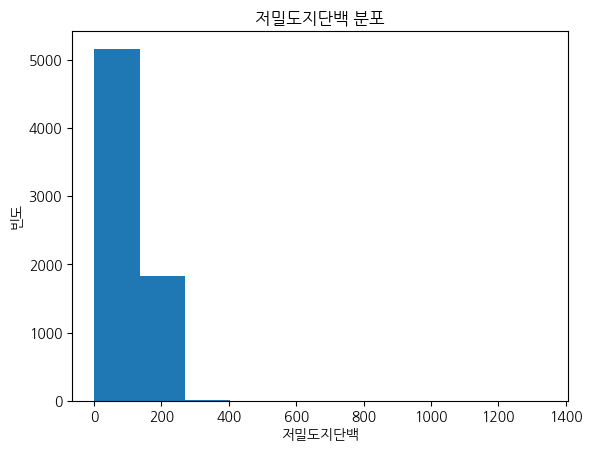

In [17]:
plt.figure()
plt.hist(health_data["저밀도지단백"])
plt.title("저밀도지단백 분포")
plt.xlabel("저밀도지단백")
plt.ylabel("빈도")
plt.show()

<Figure size 640x480 with 0 Axes>

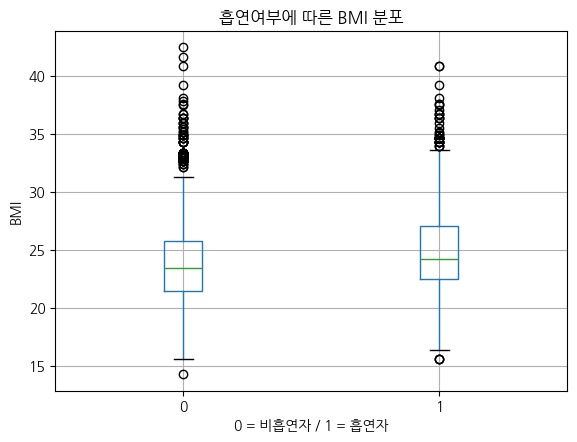

In [18]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure()
health_data.boxplot(column='BMI', by='label')
plt.title("흡연여부에 따른 BMI 분포")
plt.suptitle("")
plt.xlabel("0 = 비흡연자 / 1 = 흡연자")
plt.ylabel("BMI")
plt.show()

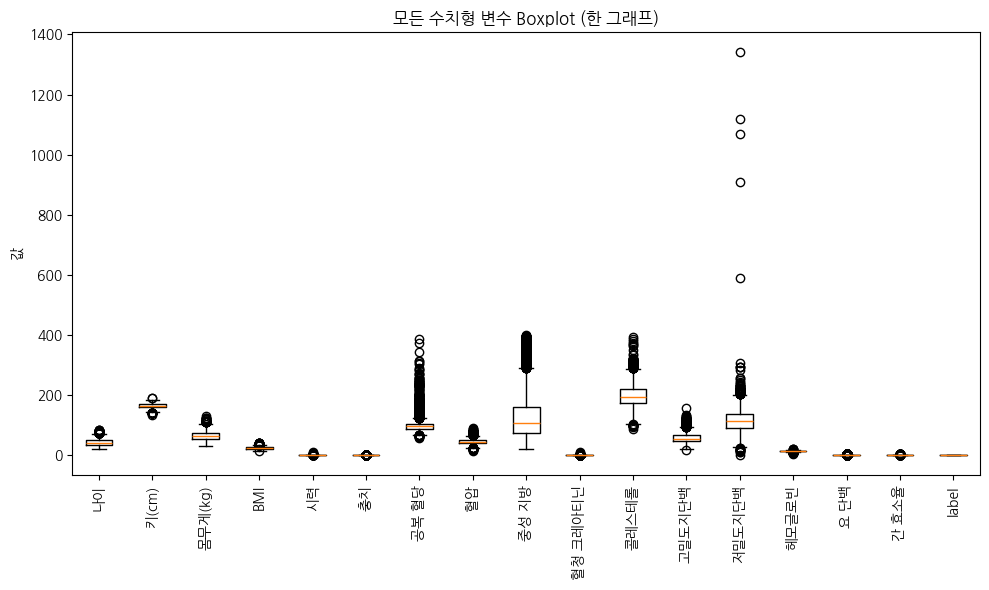

In [19]:
# 위 시각화를 통해 알게된 사실을 정리해봅시다.
# bocplot을 사용해서 이상치 확인
numeric_cols = health_data.select_dtypes(include="number").columns
data = [health_data[col].dropna() for col in numeric_cols]

plt.figure(figsize=(10, 6))
plt.boxplot(data)
plt.xticks(range(1, len(numeric_cols) + 1), numeric_cols, rotation=90)
plt.title("모든 수치형 변수 Boxplot (한 그래프)")
plt.ylabel("값")
plt.tight_layout()
plt.show()

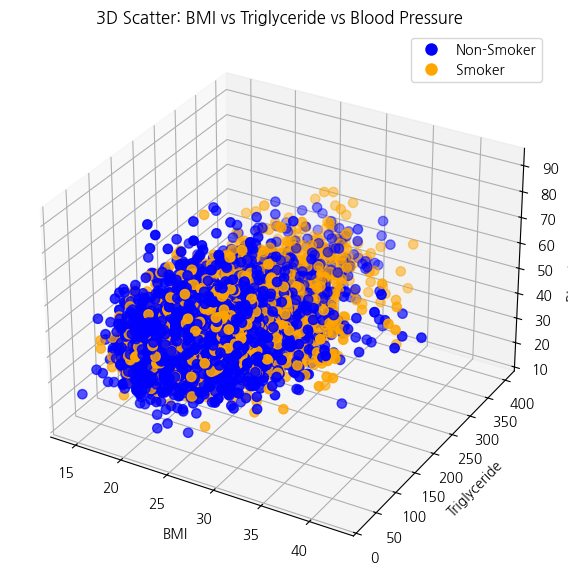

In [20]:
# 위 시각화를 통해 알게된 사실을 정리해봅시다.
x = health_data["BMI"]
y = health_data["중성 지방"]
z = health_data["혈압"]
labels = health_data["label"]
colors = labels.map({1: "orange", 0: "blue"})
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=colors, s=45)
ax.set_xlabel("BMI")
ax.set_ylabel("Triglyceride")
ax.set_zlabel("Blood Pressure")
ax.set_title("3D Scatter: BMI vs Triglyceride vs Blood Pressure")
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Non-Smoker', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Smoker', markerfacecolor='orange', markersize=10)
]

ax.legend(handles=legend_elements)

plt.show()

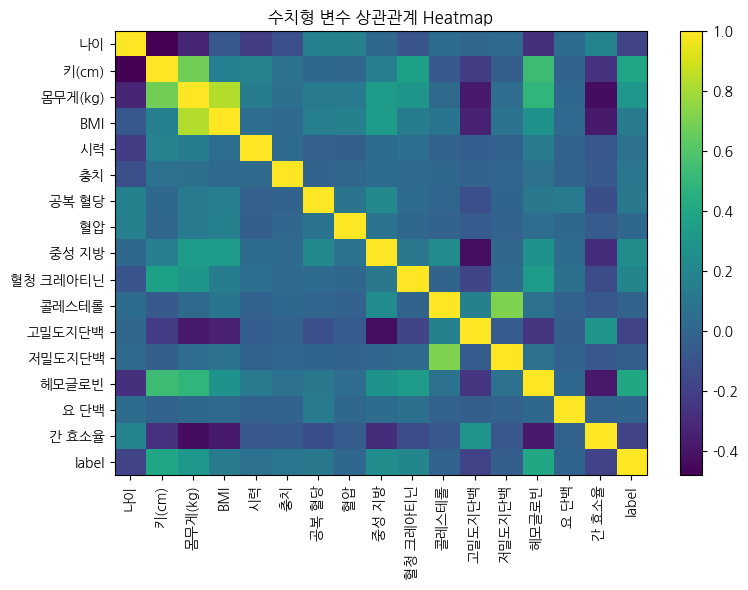

In [21]:
#단순 기법으로 결측치 제거 후 히트맵(상관관게)
numeric_df = health_data.select_dtypes(include="number")
corr = numeric_df.corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.title("수치형 변수 상관관계 Heatmap")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()

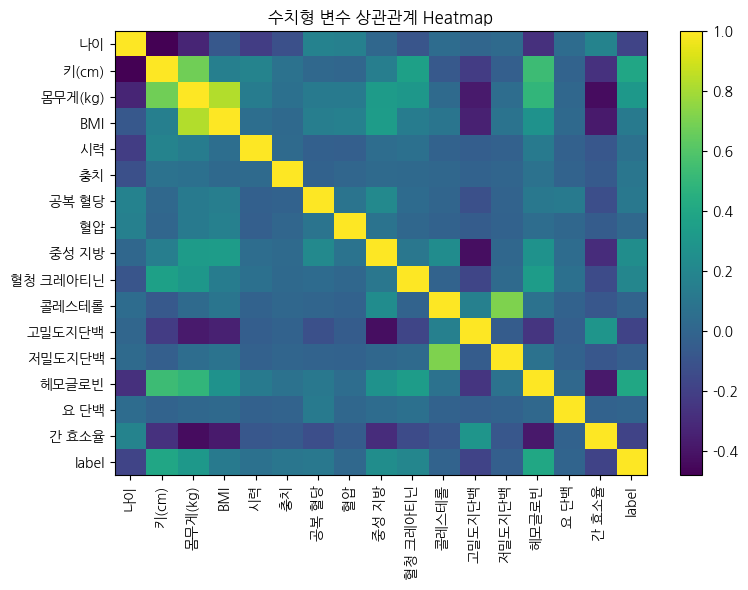

In [22]:
# MI(Multiple Imputation, 다중대체) 를 사용하여 결측치 제거 후 히트맵(상관관게)
numeric_df = df_imputed_numeric.select_dtypes(include="number")
corr = numeric_df.corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.title("수치형 변수 상관관계 Heatmap")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()

### 추가로 이상치 제거 후 상관관계 확인

In [24]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Load file

df = df_imputed_numeric

# -----------------------------
# 1) IQR 이상치 제거
# -----------------------------

numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

df_iqr = df.copy()

# 컬럼별 IQR 계산 → 반드시 원본 df 기준으로 계산해야 함
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # 원본 IQR 기준으로 필터링
    df_iqr = df_iqr[(df_iqr[col] >= lower) & (df_iqr[col] <= upper)]

# 결과 저장
iqr_path = "/content/smoking_health_data_iqr_cleaned.csv"
df_iqr.to_csv(iqr_path, index=False)



# ----------------------------------------------------
# 2) Isolation Forest 이상치 탐지 (개선된 버전)
# ----------------------------------------------------

# Isolation Forest는 반드시 스케일링해야 정확함
df_iso = df[numeric_cols].copy()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_iso)

# contamination은 직접 설정 (예: 5% 이상치를 탐지)
iso = IsolationForest(
    contamination=0.05,
    random_state=42
)

df['iso_outlier'] = iso.fit_predict(df_scaled)

# 정상값(1)만 남기기
df_iso_cleaned = df[df['iso_outlier'] == 1].drop(columns=['iso_outlier'])

# 저장
iso_path = "/content/smoking_health_data_isoforest_cleaned.csv"
df_iso_cleaned.to_csv(iso_path, index=False)


(iqr_path, iso_path)

('/content/smoking_health_data_iqr_cleaned.csv',
 '/content/smoking_health_data_isoforest_cleaned.csv')

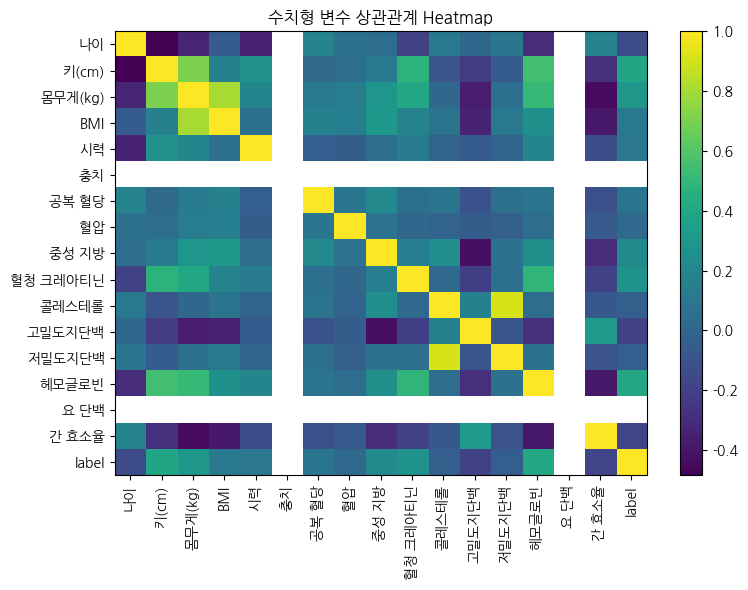

In [25]:
# MI(Multiple Imputation, 다중대체) 를 사용하여 결측치 제거 후, IQR 이상치 제거 후 히트맵(상관관게)
df1 = pd.read_csv("/content/smoking_health_data_iqr_cleaned.csv")
numeric_df = df1.select_dtypes(include="number")
corr = numeric_df.corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.title("수치형 변수 상관관계 Heatmap")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()

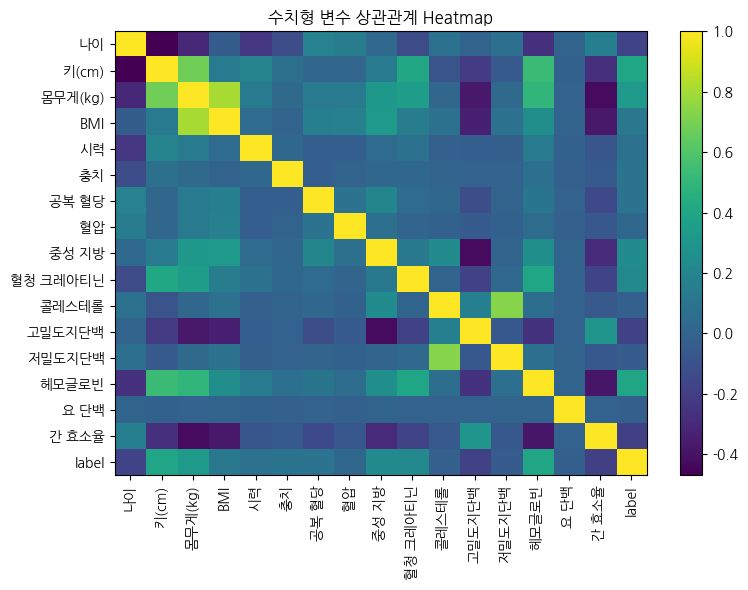

In [26]:
# MI(Multiple Imputation, 다중대체) 를 사용하여 결측치 제거 후, IQR 이상치 제거 후, Isolation Forest 이상치 탐지 후 히트맵(상관관게)
df2 = pd.read_csv("/content/smoking_health_data_isoforest_cleaned.csv")
numeric_df = df2.select_dtypes(include="number")
corr = numeric_df.corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.title("수치형 변수 상관관계 Heatmap")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()

In [27]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Load file

df = health_data

# -----------------------------
# 1) IQR 이상치 제거
# -----------------------------

numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

df_iqr = df.copy()

# 컬럼별 IQR 계산 → 반드시 원본 df 기준으로 계산해야 함
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # 원본 IQR 기준으로 필터링
    df_iqr = df_iqr[(df_iqr[col] >= lower) & (df_iqr[col] <= upper)]

# 결과 저장
iqr_path = "/content/smoking_health_data_iqr_cleaned_value.csv"
df_iqr.to_csv(iqr_path, index=False)



# ----------------------------------------------------
# 2) Isolation Forest 이상치 탐지 (개선된 버전)
# ----------------------------------------------------

# Isolation Forest는 반드시 스케일링해야 정확함
df_iso = df[numeric_cols].copy()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_iso)

# contamination은 직접 설정 (예: 5% 이상치를 탐지)
iso = IsolationForest(
    contamination=0.05,
    random_state=42
)

df['iso_outlier'] = iso.fit_predict(df_scaled)

# 정상값(1)만 남기기
df_iso_cleaned = df[df['iso_outlier'] == 1].drop(columns=['iso_outlier'])

# 저장
iso_path = "/content/smoking_health_data_isoforest_cleaned_value.csv"
df_iso_cleaned.to_csv(iso_path, index=False)


(iqr_path, iso_path)

('/content/smoking_health_data_iqr_cleaned_value.csv',
 '/content/smoking_health_data_isoforest_cleaned_value.csv')

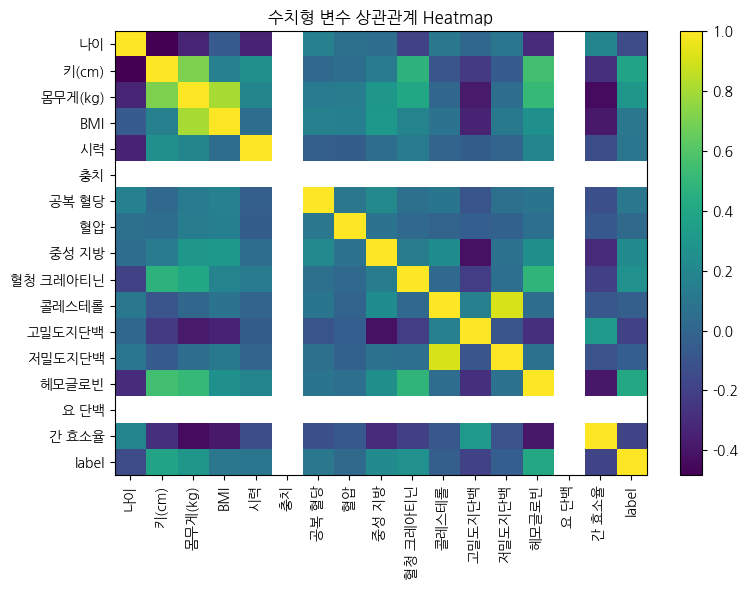

In [28]:
#단순 기법으로 결측치 제거 후, IQR 이상치 제거 후 히트맵(상관관게)
df1 = pd.read_csv("/content/smoking_health_data_iqr_cleaned_value.csv")
numeric_df = df1.select_dtypes(include="number")
corr = numeric_df.corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.title("수치형 변수 상관관계 Heatmap")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()

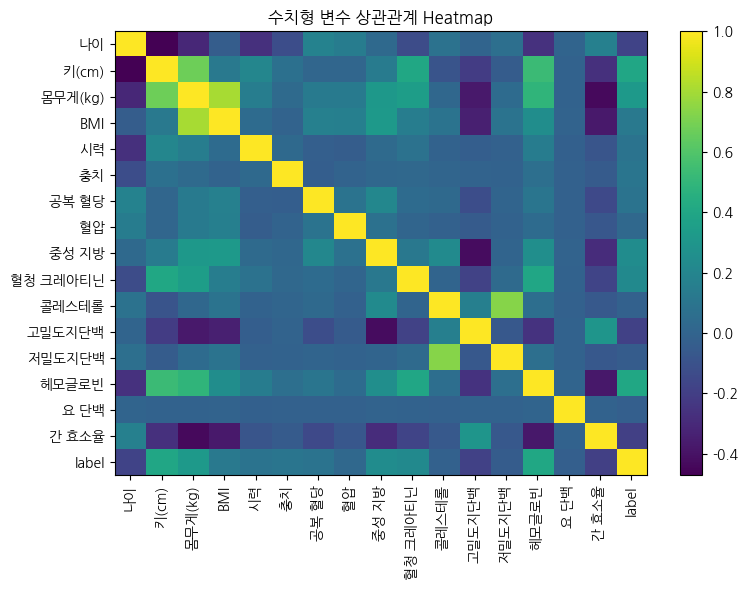

In [29]:
#단순 기법으로 결측치 제거 후, IQR 이상치 제거 후, Isolation Forest 이상치 탐지 후 히트맵(상관관게)
df2 = pd.read_csv("/content/smoking_health_data_isoforest_cleaned_value.csv")
numeric_df = df2.select_dtypes(include="number")
corr = numeric_df.corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.title("수치형 변수 상관관계 Heatmap")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()

### 여러 의학 논문에서 이상치를 제거하는 방식으로 2중 필터를 적용하여 이상치를 제거하는 방식을 많이 사용한다고 나와있다. 파라미터값들을 수정하여 이상치의 값들을 정리 하였고 IQR에서는 컬럼별로 이상치를 처리해야하기 때문에 코드를 약간 수정하여 정리 하였다. 그 후 결과를 보니 키 와 헤모글로빈이 상관 관계가 높게 나오고 있다.


In [30]:
health_data.describe()

,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label,iso_outlier
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,43.973571,164.781429,65.932857,24.144423,1.015186,0.227429,99.309236,45.544000,127.023015,0.884900,197.276571,57.355429,115.346857,14.631914,1.083857,1.144696,0.367286,0.900000
std,12.063793,9.170213,12.978702,3.501945,0.426631,0.419202,20.981702,8.743135,72.487870,0.241523,36.306494,14.506945,41.788153,1.540907,0.392051,0.432735,0.482100,0.435921
min,20.000000,135.000000,30.000000,14.270000,0.100000,0.000000,57.000000,14.000000,21.000000,0.100000,86.000000,18.000000,1.000000,4.900000,1.000000,0.140000,0.000000,-1.000000
25%,35.000000,160.000000,55.000000,21.600000,0.800000,0.000000,89.000000,40.000000,74.000000,0.800000,173.000000,47.000000,92.000000,13.600000,1.000000,0.840000,0.000000,1.000000
50%,40.000000,165.000000,65.000000,23.880000,1.000000,0.000000,96.000000,45.000000,108.000000,0.900000,195.000000,55.000000,113.000000,14.800000,1.000000,1.100000,0.000000,1.000000
75%,50.000000,170.000000,75.000000,26.120000,1.200000,0.000000,103.000000,50.000000,160.000000,1.000000,219.000000,66.000000,136.000000,15.700000,1.000000,1.380000,1.000000,1.000000
max,85.000000,190.000000,130.000000,42.450000,9.900000,1.000000,386.000000,91.000000,399.000000,10.000000,395.000000,157.000000,1340.000000,20.900000,5.000000,5.670000,1.000000,1.000000


In [31]:
df_imputed_numeric.describe()

,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label,iso_outlier
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,43.973571,164.781429,65.932857,24.144423,1.012353,0.227429,99.183371,45.542923,127.185867,0.884900,197.276571,57.355429,115.346857,14.631914,1.083857,1.144696,0.367286,0.900000
std,12.063793,9.170213,12.978702,3.501945,0.430194,0.419202,21.643738,8.857770,73.999888,0.241523,36.306494,14.506945,41.788153,1.540907,0.392051,0.432735,0.482100,0.435921
min,20.000000,135.000000,30.000000,14.270000,0.049712,0.000000,-11.704611,14.000000,-150.138234,0.100000,86.000000,18.000000,1.000000,4.900000,1.000000,0.140000,0.000000,-1.000000
25%,35.000000,160.000000,55.000000,21.600000,0.800000,0.000000,89.000000,40.000000,74.000000,0.800000,173.000000,47.000000,92.000000,13.600000,1.000000,0.840000,0.000000,1.000000
50%,40.000000,165.000000,65.000000,23.880000,1.000000,0.000000,96.000000,45.000000,107.000000,0.900000,195.000000,55.000000,113.000000,14.800000,1.000000,1.100000,0.000000,1.000000
75%,50.000000,170.000000,75.000000,26.120000,1.200000,0.000000,104.000000,50.000000,162.000000,1.000000,219.000000,66.000000,136.000000,15.700000,1.000000,1.380000,1.000000,1.000000
max,85.000000,190.000000,130.000000,42.450000,9.900000,1.000000,386.000000,91.000000,490.411707,10.000000,395.000000,157.000000,1340.000000,20.900000,5.000000,5.670000,1.000000,1.000000
